In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
import sys
import time
import pandas as pd
import cv2
import os
import imageio
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import masks
import gif
import raw
import lineage

In [2]:
# Input file
fN = h5py.File("../6823_3/6823_3_featuresN.hdf5", "r")

# Define dorsal and ventral coordinates
coordinates = fN['coordinates']
dorsal = coordinates['dorsal_contours']
ventral = coordinates['ventral_contours']

# trajectory_data and timeseries_data
traj = pd.read_hdf("../6823_3/6823_3_featuresN.hdf5", '/trajectories_data')
timeseries = fN['timeseries_data']

In [8]:
# Get wells - data from timeseries_data, at position [2]
wells = ['A9', 'A10', 'A11', 'A12', 'B9', 'B10', 'B11', 'B12', 'C9', 'C10', 'C11', 'C12', 'D9', 'D10', 'D11', 'D12']
#wells = [each.encode() for each in wells]

well_dict = {}
for each in wells:
    well_dict[each] = []
    
#print('A1'.encode().decode())
for i, each in enumerate(timeseries[:]):  # "i" == index
    well = each[2].decode()
    #well_dict[well] = []
    if well in well_dict.keys():
        well_dict[well].append(i)

In [4]:
# Well positions:

d12 = [180, 710, 140, 670]
d11 = [180, 710, 860, 1390]
d10 = [180, 710, 1590, 2120]
d9 = [180, 710, 2300, 2830]

c12 = [900, 1430, 140, 670]
c11 = [900, 1430, 860, 1390]
c10 = [900, 1430, 1590, 2120]
c9 = [900, 1430, 2300, 2830]

b12 = [1620, 2150, 140, 670]
b11 = [1620, 2150, 860, 1390]
b10 = [1620, 2150, 1590, 2120]
b9 = [1620, 2150, 2300, 2830]

a12 = [2340, 2870, 140, 670]
a11 = [2340, 2870, 860, 1390]
a10 = [2340, 2870, 1590, 2120]
a9 = [2340, 2870, 2300, 2830]

In [5]:
well_names = list(well_dict.keys())
well_names

['A9',
 'A10',
 'A11',
 'A12',
 'B9',
 'B10',
 'B11',
 'B12',
 'C9',
 'C10',
 'C11',
 'C12',
 'D9',
 'D10',
 'D11',
 'D12']

In [6]:
### Finish making masks~

#for well in well_names:
#    masks.make_well_masks(well=well, traj=traj, dorsal=dorsal, ventral=ventral, well_dict=well_dict, down_sampling=6, file_dir="../6823_3/", sequential=False)

# Raw

In [12]:
wells = [d12,d11,d10,d9,c12,c11,c10,c9,b12,b11,b10,b9,a12,a11,a10,a9]
wells = wells[::-1]
wells
well_names = list(well_dict.keys())

In [24]:
for i, well_name in enumerate(well_names[13:]):
    output = "../6823_3/raw_wells/%s_raw.npy" % well_name
    raw.get_raw_well(wells[i+13], well_name=well_name, video_path="../6823_3/6823_3.mp4", filename=output, frame_start=0, frame_end=9001, down_sampling=1) 

-------- D10 --------
-------- D11 --------
-------- D12 --------


In [31]:
well_name = 'D10'
output = "../6823_3/raw_wells/%s_raw.npy" % well_name
raw.get_raw_well(wells[13], well_name=well_name, video_path="../6823_3/6823_3.mp4", filename=output, frame_start=0, frame_end=9001, down_sampling=1) 

-------- D10 --------


In [32]:
for well_name in well_names[13:]:
    print(well_name)
    raw_video_path = '../6823_3/raw_wells/%s_raw.npy' % well_name
    txt = '../6823_3/%s_not_empty.txt' % well_name
    raw.make_raw_videos(raw_video_path=raw_video_path, mask_frame_info_fn=txt, well_name=well_name, output_dir='../6823_3')

D10
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
D11
(100, 530, 530, 1)
(100, 530, 530, 1)
D12
(100, 530, 530, 1)
(100, 530, 530, 1)


Processing raw video.
unique_worm_ids:  [5, 6]
sequential ids:  [1, 2]
Processing raw video.
unique_worm_ids:  [28, 30]
sequential ids:  [1, 2]
Processing raw video.
unique_worm_ids:  [33]
sequential ids:  [1]


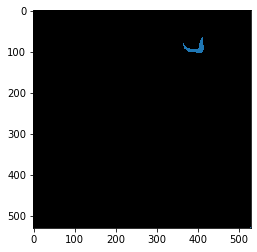

In [34]:
gif.plot_gif(np.load('../6823_3/A10_raw_1.npy'), '../6823_3/gif/A10_raw_1.gif', raw=True)
gif.plot_gif(np.load('../6823_3/A10_mask_1.npy'), '../6823_3/gif/A10_mask_1.gif')

gif.plot_gif(np.load('../6823_3/D12_raw_1.npy'), '../6823_3/gif/D12_raw_1.gif', raw=True)
gif.plot_gif(np.load('../6823_3/D12_mask_1.npy'), '../6823_3/gif/D12_mask_1.gif')

gif.plot_gif(np.load('../6823_3/D10_raw_1.npy'), '../6823_3/gif/D10_raw_1.gif', raw=True)
gif.plot_gif(np.load('../6823_3/D10_mask_1.npy'), '../6823_3/gif/D10_mask_1.gif')

# Lineages

In [35]:
from lineage import make_lineage

a9_1 = make_lineage(traj, well_dict, 'A9', "6823_3", "../6823_3/A9_mask_1.npy", 1)
a9_2 = make_lineage(traj, well_dict, 'A9', "6823_3", "../6823_3/A9_mask_2.npy", 2)
a9_3 = make_lineage(traj, well_dict, 'A9', "6823_3", "../6823_3/A9_mask_3.npy", 3)
a9_4 = make_lineage(traj, well_dict, 'A9', "6823_3", "../6823_3/A9_mask_4.npy", 4)

a10_1 = make_lineage(traj, well_dict, 'A10', "6823_3", "../6823_3/A10_mask_1.npy", 1)
a10_2 = make_lineage(traj, well_dict, 'A10', "6823_3", "../6823_3/A10_mask_2.npy", 2)
a10_3 = make_lineage(traj, well_dict, 'A10', "6823_3", "../6823_3/A10_mask_3.npy", 3)
a10_4 = make_lineage(traj, well_dict, 'A10', "6823_3", "../6823_3/A10_mask_4.npy", 4)

a11_1 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_1.npy", 1)
a11_2 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_2.npy", 2)
a11_3 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_3.npy", 3)
a11_4 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_4.npy", 4)
a11_5 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_5.npy", 5)
a11_6 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_6.npy", 6)
a11_7 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_7.npy", 7)
a11_8 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_8.npy", 8)
a11_9 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_9.npy", 9)
a11_10 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_10.npy", 10)
a11_11 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_11.npy", 11)
a11_12 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_12.npy", 12)
a11_13 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_13.npy", 13)
a11_14 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_14.npy", 14)
a11_15 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_15.npy", 15)
a11_16 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_16.npy", 16)
a11_17 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_17.npy", 17)
a11_18 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_18.npy", 18)
a11_19 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_19.npy", 19)
a11_20 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_20.npy", 20)
a11_21 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_21.npy", 21)
a11_22 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_22.npy", 22)
a11_23 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_23.npy", 23)
a11_24 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_24.npy", 24)
a11_25 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_25.npy", 25)
a11_26 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_26.npy", 26)
a11_27 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_27.npy", 27)
a11_28 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_28.npy", 28)
a11_29 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_29.npy", 29)
a11_30 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_30.npy", 30)
a11_31 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_31.npy", 31)
a11_32 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_32.npy", 32)
a11_33 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_33.npy", 33)
a11_34 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_34.npy", 34)
a11_35 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_35.npy", 35)
a11_36 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_36.npy", 36)
a11_37 = make_lineage(traj, well_dict, 'A11', "6823_3", "../6823_3/A11_mask_37.npy", 37)


a12_1 = make_lineage(traj, well_dict, 'A12', "6823_3", "../6823_3/A12_mask_1.npy", 1)
a12_2 = make_lineage(traj, well_dict, 'A12', "6823_3", "../6823_3/A12_mask_2.npy", 2)

b9_1 = make_lineage(traj, well_dict, 'B9', "6823_3", "../6823_3/B9_mask_1.npy", 1)

b10_1 = make_lineage(traj, well_dict, 'B10', "6823_3", "../6823_3/B10_mask_1.npy", 1)
b10_2 = make_lineage(traj, well_dict, 'B10', "6823_3", "../6823_3/B10_mask_2.npy", 2)
b10_3 = make_lineage(traj, well_dict, 'B10', "6823_3", "../6823_3/B10_mask_3.npy", 3)

b11_1 = make_lineage(traj, well_dict, 'B11', "6823_3", "../6823_3/B11_mask_1.npy", 1)
b11_2 = make_lineage(traj, well_dict, 'B11', "6823_3", "../6823_3/B11_mask_2.npy", 2)
b11_3 = make_lineage(traj, well_dict, 'B11', "6823_3", "../6823_3/B11_mask_3.npy", 3)
b11_4 = make_lineage(traj, well_dict, 'B11', "6823_3", "../6823_3/B11_mask_4.npy", 4)
b11_5 = make_lineage(traj, well_dict, 'B11', "6823_3", "../6823_3/B11_mask_5.npy", 5)
b11_6 = make_lineage(traj, well_dict, 'B11', "6823_3", "../6823_3/B11_mask_6.npy", 6)

b12_1 = make_lineage(traj, well_dict, 'B12', "6823_3", "../6823_3/B12_mask_1.npy", 1)
b12_2 = make_lineage(traj, well_dict, 'B12', "6823_3", "../6823_3/B12_mask_2.npy", 2)
b12_3 = make_lineage(traj, well_dict, 'B12', "6823_3", "../6823_3/B12_mask_3.npy", 3)
b12_4 = make_lineage(traj, well_dict, 'B12', "6823_3", "../6823_3/B12_mask_4.npy", 4)
b12_5 = make_lineage(traj, well_dict, 'B12', "6823_3", "../6823_3/B12_mask_5.npy", 5)

c9_1 = make_lineage(traj, well_dict, 'C9', "6823_3", "../6823_3/C9_mask_1.npy", 1)
c9_2 = make_lineage(traj, well_dict, 'C9', "6823_3", "../6823_3/C9_mask_2.npy", 2)
c9_3 = make_lineage(traj, well_dict, 'C9', "6823_3", "../6823_3/C9_mask_3.npy", 3)
c9_4 = make_lineage(traj, well_dict, 'C9', "6823_3", "../6823_3/C9_mask_4.npy", 4)
c9_5 = make_lineage(traj, well_dict, 'C9', "6823_3", "../6823_3/C9_mask_5.npy", 5)
c9_6 = make_lineage(traj, well_dict, 'C9', "6823_3", "../6823_3/C9_mask_6.npy", 6)
c9_7 = make_lineage(traj, well_dict, 'C9', "6823_3", "../6823_3/C9_mask_7.npy", 7)
c9_8 = make_lineage(traj, well_dict, 'C9', "6823_3", "../6823_3/C9_mask_8.npy", 8)
c9_9 = make_lineage(traj, well_dict, 'C9', "6823_3", "../6823_3/C9_mask_9.npy", 9)

c10_1 = make_lineage(traj, well_dict, 'C10', "6823_3", "../6823_3/C10_mask_1.npy", 1)
c10_2 = make_lineage(traj, well_dict, 'C10', "6823_3", "../6823_3/C10_mask_2.npy", 2)
c11_1 = make_lineage(traj, well_dict, 'C11', "6823_3", "../6823_3/C11_mask_1.npy", 1)
c11_2 = make_lineage(traj, well_dict, 'C11', "6823_3", "../6823_3/C11_mask_2.npy", 2)
c11_3 = make_lineage(traj, well_dict, 'C11', "6823_3", "../6823_3/C11_mask_3.npy", 3)
c11_4 = make_lineage(traj, well_dict, 'C11', "6823_3", "../6823_3/C11_mask_4.npy", 4)
c11_5 = make_lineage(traj, well_dict, 'C11', "6823_3", "../6823_3/C11_mask_5.npy", 5)
c11_6 = make_lineage(traj, well_dict, 'C11', "6823_3", "../6823_3/C11_mask_6.npy", 6)
c11_7 = make_lineage(traj, well_dict, 'C11', "6823_3", "../6823_3/C11_mask_7.npy", 7)

c12_1 = make_lineage(traj, well_dict, 'C12', "6823_3", "../6823_3/C12_mask_1.npy", 1)
c12_2 = make_lineage(traj, well_dict, 'C12', "6823_3", "../6823_3/C12_mask_2.npy", 2)

d9_1 = make_lineage(traj, well_dict, 'D9', "6823_3", "../6823_3/D9_mask_1.npy", 1)
d9_2 = make_lineage(traj, well_dict, 'D9', "6823_3", "../6823_3/D9_mask_2.npy", 2)
d9_3 = make_lineage(traj, well_dict, 'D9', "6823_3", "../6823_3/D9_mask_3.npy", 3)
d9_4 = make_lineage(traj, well_dict, 'D9', "6823_3", "../6823_3/D9_mask_4.npy", 4)
d9_5 = make_lineage(traj, well_dict, 'D9', "6823_3", "../6823_3/D9_mask_5.npy", 5)
d9_6 = make_lineage(traj, well_dict, 'D9', "6823_3", "../6823_3/D9_mask_6.npy", 6)
d9_7 = make_lineage(traj, well_dict, 'D9', "6823_3", "../6823_3/D9_mask_7.npy", 7)
d9_8 = make_lineage(traj, well_dict, 'D9', "6823_3", "../6823_3/D9_mask_8.npy", 8)
d9_9 = make_lineage(traj, well_dict, 'D9', "6823_3", "../6823_3/D9_mask_9.npy", 9)

d10_1 = make_lineage(traj, well_dict, 'D10', "6823_3", "../6823_3/D10_mask_1.npy", 1)
d10_2 = make_lineage(traj, well_dict, 'D10', "6823_3", "../6823_3/D10_mask_2.npy", 2)
d10_3 = make_lineage(traj, well_dict, 'D10', "6823_3", "../6823_3/D10_mask_3.npy", 3)

d11_1 = make_lineage(traj, well_dict, 'D11', "6823_3", "../6823_3/D11_mask_1.npy", 1)
d11_2 = make_lineage(traj, well_dict, 'D11', "6823_3", "../6823_3/D11_mask_2.npy", 2)

d12_1 = make_lineage(traj, well_dict, 'D12', "6823_3", "../6823_3/D12_mask_1.npy", 1)
d12_2 = make_lineage(traj, well_dict, 'D12', "6823_3", "../6823_3/D12_mask_2.npy", 2)

In [43]:
masks_fn = [
    "../6823_3/A9_mask_1.npy",
    "../6823_3/A9_mask_2.npy",
    "../6823_3/A9_mask_3.npy",
    "../6823_3/A9_mask_4.npy",

    "../6823_3/A10_mask_1.npy",
    "../6823_3/A10_mask_2.npy",
    "../6823_3/A10_mask_3.npy",
    "../6823_3/A10_mask_4.npy",

    "../6823_3/A11_mask_1.npy",
    "../6823_3/A11_mask_2.npy",
    "../6823_3/A11_mask_3.npy",
    "../6823_3/A11_mask_4.npy",
    "../6823_3/A11_mask_5.npy",
    "../6823_3/A11_mask_6.npy",
    "../6823_3/A11_mask_7.npy",
    "../6823_3/A11_mask_8.npy",
    "../6823_3/A11_mask_9.npy",
    "../6823_3/A11_mask_10.npy",
    "../6823_3/A11_mask_11.npy",
    "../6823_3/A11_mask_12.npy",
    "../6823_3/A11_mask_13.npy",
    "../6823_3/A11_mask_14.npy",
    "../6823_3/A11_mask_15.npy",
    "../6823_3/A11_mask_16.npy",
    "../6823_3/A11_mask_17.npy",
    "../6823_3/A11_mask_18.npy",
    "../6823_3/A11_mask_19.npy",
    "../6823_3/A11_mask_20.npy",
    "../6823_3/A11_mask_21.npy",
    "../6823_3/A11_mask_22.npy",
    "../6823_3/A11_mask_23.npy",
    "../6823_3/A11_mask_24.npy",
    "../6823_3/A11_mask_25.npy",
    "../6823_3/A11_mask_26.npy",
    "../6823_3/A11_mask_27.npy",
    "../6823_3/A11_mask_28.npy",
    "../6823_3/A11_mask_29.npy",
    "../6823_3/A11_mask_30.npy",
    "../6823_3/A11_mask_31.npy",
    "../6823_3/A11_mask_32.npy",
    "../6823_3/A11_mask_33.npy",
    "../6823_3/A11_mask_34.npy",
    "../6823_3/A11_mask_35.npy",
    "../6823_3/A11_mask_36.npy",
    "../6823_3/A11_mask_37.npy",


    "../6823_3/A12_mask_1.npy",
    "../6823_3/A12_mask_2.npy",

    "../6823_3/B9_mask_1.npy",

    "../6823_3/B10_mask_1.npy",
    "../6823_3/B10_mask_2.npy",
    "../6823_3/B10_mask_3.npy",

    "../6823_3/B11_mask_1.npy",
    "../6823_3/B11_mask_2.npy",
    "../6823_3/B11_mask_3.npy",
    "../6823_3/B11_mask_4.npy",
    "../6823_3/B11_mask_5.npy",
    "../6823_3/B11_mask_6.npy",

    "../6823_3/B12_mask_1.npy",
    "../6823_3/B12_mask_2.npy",
    "../6823_3/B12_mask_3.npy",
    "../6823_3/B12_mask_4.npy",
    "../6823_3/B12_mask_5.npy",

    "../6823_3/C9_mask_1.npy",
    "../6823_3/C9_mask_2.npy",
    "../6823_3/C9_mask_3.npy",
    "../6823_3/C9_mask_4.npy",
    "../6823_3/C9_mask_5.npy",
    "../6823_3/C9_mask_6.npy",
    "../6823_3/C9_mask_7.npy",
    "../6823_3/C9_mask_8.npy",
    "../6823_3/C9_mask_9.npy",

    "../6823_3/C10_mask_1.npy",
    "../6823_3/C10_mask_2.npy",
    "../6823_3/C11_mask_1.npy",
    "../6823_3/C11_mask_2.npy",
    "../6823_3/C11_mask_3.npy",
    "../6823_3/C11_mask_4.npy",
    "../6823_3/C11_mask_5.npy",
    "../6823_3/C11_mask_6.npy",
    "../6823_3/C11_mask_7.npy",

    "../6823_3/C12_mask_1.npy",
    "../6823_3/C12_mask_2.npy",

    "../6823_3/D9_mask_1.npy",
    "../6823_3/D9_mask_2.npy",
    "../6823_3/D9_mask_3.npy",
    "../6823_3/D9_mask_4.npy",
    "../6823_3/D9_mask_5.npy",
    "../6823_3/D9_mask_6.npy",
    "../6823_3/D9_mask_7.npy",
    "../6823_3/D9_mask_8.npy",
    "../6823_3/D9_mask_9.npy",

    "../6823_3/D10_mask_1.npy",
    "../6823_3/D10_mask_2.npy",
    "../6823_3/D10_mask_3.npy",

    "../6823_3/D11_mask_1.npy",
    "../6823_3/D11_mask_2.npy",

    "../6823_3/D12_mask_1.npy",
    "../6823_3/D12_mask_2.npy"
]

In [44]:
raw_fn = [
    "../6823_3/A9_raw_1.npy",
    "../6823_3/A9_raw_2.npy",
    "../6823_3/A9_raw_3.npy",
    "../6823_3/A9_raw_4.npy",

    "../6823_3/A10_raw_1.npy",
    "../6823_3/A10_raw_2.npy",
    "../6823_3/A10_raw_3.npy",
    "../6823_3/A10_raw_4.npy",

    "../6823_3/A11_raw_1.npy",
    "../6823_3/A11_raw_2.npy",
    "../6823_3/A11_raw_3.npy",
    "../6823_3/A11_raw_4.npy",
    "../6823_3/A11_raw_5.npy",
    "../6823_3/A11_raw_6.npy",
    "../6823_3/A11_raw_7.npy",
    "../6823_3/A11_raw_8.npy",
    "../6823_3/A11_raw_9.npy",
    "../6823_3/A11_raw_10.npy",
    "../6823_3/A11_raw_11.npy",
    "../6823_3/A11_raw_12.npy",
    "../6823_3/A11_raw_13.npy",
    "../6823_3/A11_raw_14.npy",
    "../6823_3/A11_raw_15.npy",
    "../6823_3/A11_raw_16.npy",
    "../6823_3/A11_raw_17.npy",
    "../6823_3/A11_raw_18.npy",
    "../6823_3/A11_raw_19.npy",
    "../6823_3/A11_raw_20.npy",
    "../6823_3/A11_raw_21.npy",
    "../6823_3/A11_raw_22.npy",
    "../6823_3/A11_raw_23.npy",
    "../6823_3/A11_raw_24.npy",
    "../6823_3/A11_raw_25.npy",
    "../6823_3/A11_raw_26.npy",
    "../6823_3/A11_raw_27.npy",
    "../6823_3/A11_raw_28.npy",
    "../6823_3/A11_raw_29.npy",
    "../6823_3/A11_raw_30.npy",
    "../6823_3/A11_raw_31.npy",
    "../6823_3/A11_raw_32.npy",
    "../6823_3/A11_raw_33.npy",
    "../6823_3/A11_raw_34.npy",
    "../6823_3/A11_raw_35.npy",
    "../6823_3/A11_raw_36.npy",
    "../6823_3/A11_raw_37.npy",


    "../6823_3/A12_raw_1.npy",
    "../6823_3/A12_raw_2.npy",

    "../6823_3/B9_raw_1.npy",

    "../6823_3/B10_raw_1.npy",
    "../6823_3/B10_raw_2.npy",
    "../6823_3/B10_raw_3.npy",

    "../6823_3/B11_raw_1.npy",
    "../6823_3/B11_raw_2.npy",
    "../6823_3/B11_raw_3.npy",
    "../6823_3/B11_raw_4.npy",
    "../6823_3/B11_raw_5.npy",
    "../6823_3/B11_raw_6.npy",

    "../6823_3/B12_raw_1.npy",
    "../6823_3/B12_raw_2.npy",
    "../6823_3/B12_raw_3.npy",
    "../6823_3/B12_raw_4.npy",
    "../6823_3/B12_raw_5.npy",

    "../6823_3/C9_raw_1.npy",
    "../6823_3/C9_raw_2.npy",
    "../6823_3/C9_raw_3.npy",
    "../6823_3/C9_raw_4.npy",
    "../6823_3/C9_raw_5.npy",
    "../6823_3/C9_raw_6.npy",
    "../6823_3/C9_raw_7.npy",
    "../6823_3/C9_raw_8.npy",
    "../6823_3/C9_raw_9.npy",

    "../6823_3/C10_raw_1.npy",
    "../6823_3/C10_raw_2.npy",
    "../6823_3/C11_raw_1.npy",
    "../6823_3/C11_raw_2.npy",
    "../6823_3/C11_raw_3.npy",
    "../6823_3/C11_raw_4.npy",
    "../6823_3/C11_raw_5.npy",
    "../6823_3/C11_raw_6.npy",
    "../6823_3/C11_raw_7.npy",

    "../6823_3/C12_raw_1.npy",
    "../6823_3/C12_raw_2.npy",

    "../6823_3/D9_raw_1.npy",
    "../6823_3/D9_raw_2.npy",
    "../6823_3/D9_raw_3.npy",
    "../6823_3/D9_raw_4.npy",
    "../6823_3/D9_raw_5.npy",
    "../6823_3/D9_raw_6.npy",
    "../6823_3/D9_raw_7.npy",
    "../6823_3/D9_raw_8.npy",
    "../6823_3/D9_raw_9.npy",

    "../6823_3/D10_raw_1.npy",
    "../6823_3/D10_raw_2.npy",
    "../6823_3/D10_raw_3.npy",

    "../6823_3/D11_raw_1.npy",
    "../6823_3/D11_raw_2.npy",

    "../6823_3/D12_raw_1.npy",
    "../6823_3/D12_raw_2.npy"
]

In [38]:
lineages = [
a9_1,
a9_2,
a9_3,
a9_4,

a10_1,
a10_2,
a10_3,
a10_4,

a11_1,
a11_2,
a11_3,
a11_4,
a11_5,
a11_6,
a11_7,
a11_8,
a11_9,
a11_10,
a11_11,
a11_12,
a11_13,
a11_14,
a11_15,
a11_16,
a11_17,
a11_18,
a11_19,
a11_20,
a11_21,
a11_22,
a11_23,
a11_24,
a11_25,
a11_26,
a11_27,
a11_28,
a11_29,
a11_30,
a11_31,
a11_32,
a11_33,
a11_34,
a11_35,
a11_36,
a11_37,


a12_1,
a12_2,

b9_1,

b10_1,
b10_2,
b10_3,

b11_1,
b11_2,
b11_3,
b11_4,
b11_5,
b11_6,

b12_1,
b12_2,
b12_3,
b12_4,
b12_5,

c9_1,
c9_2,
c9_3,
c9_4,
c9_5,
c9_6,
c9_7,
c9_8,
c9_9,

c10_1,
c10_2,
c11_1,
c11_2,
c11_3,
c11_4,
c11_5,
c11_6,
c11_7,

c12_1,
c12_2,

d9_1,
d9_2,
d9_3,
d9_4,
d9_5,
d9_6,
d9_7,
d9_8,
d9_9,

d10_1,
d10_2,
d10_3,

d11_1,
d11_2,

d12_1,
d12_2,
]

In [45]:
y = []
y_indices = []

for i, mask in enumerate(masks_fn):
    mask_array = np.load(mask)
    if mask_array.shape[0] == 100:
        y.append(mask_array)
        y_indices.append(i)

X = []

for i in y_indices:
    raw_array = np.load(raw_fn[i])
    X.append(raw_array)
    
lineages_true = []

for i in y_indices:
    lineages_true.append(lineages[i])

print(len(y))
print(len(X))
print(len(lineages_true))

33
33
33


In [46]:
from deepcell.utils.tracking_utils import trks_stats, save_trks

save_trks("../6823_3/6823_3.trks", lineages_true, X, y)